In [20]:
import tensorflow as tf
from tensorflow.keras import layers, models, initializers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [21]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels, test_labels = to_categorical(train_labels), to_categorical(test_labels)

In [22]:
def create_model(initializer,activation='relu', dropout_rate=0.0, l2_regularizer=None):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(32, 32, 3)))
    model.add(layers.Dense(512, kernel_initializer=initializer, kernel_regularizer=l2_regularizer, activation='relu'))
    model.add(layers.Dense(256, kernel_initializer=initializer, kernel_regularizer=l2_regularizer, activation='relu'))
    model.add(layers.Dense(128, kernel_initializer=initializer, kernel_regularizer=l2_regularizer, activation='relu'))
    model.add(layers.Dense(64, kernel_initializer=initializer, kernel_regularizer=l2_regularizer, activation='relu'))  
    model.add(layers.Dense(32, kernel_initializer=initializer, kernel_regularizer=l2_regularizer, activation='relu'))  
    model.add(layers.Dense(10, activation='softmax'))
    return model

In [23]:
xavier_initializer = initializers.glorot_normal()
kaiming_initializer = initializers.he_normal()

In [15]:
xavier_model = create_model(xavier_initializer, dropout_rate=0.3, l2_regularizer=tf.keras.regularizers.l2(0.001))
kaiming_model = create_model(kaiming_initializer, dropout_rate=0.3, l2_regularizer=tf.keras.regularizers.l2(0.001))
xavier_model.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])
kaiming_model.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])
xavier_history = xavier_model.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels))
kaiming_history = kaiming_model.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels))

Epoch 1/20


2025-08-13 14:30:19.448913: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 22ms/step - accuracy: 0.2358 - loss: 2.4615 - val_accuracy: 0.3214 - val_loss: 1.9614
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.3378 - loss: 1.9301 - val_accuracy: 0.3645 - val_loss: 1.8758
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.3514 - loss: 1.8683 - val_accuracy: 0.3775 - val_loss: 1.8107
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.3714 - loss: 1.8265 - val_accuracy: 0.4124 - val_loss: 1.7400
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 21ms/step - accuracy: 0.3908 - loss: 1.7764 - val_accuracy: 0.4067 - val_loss: 1.7505
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.3948 - loss: 1.7646 - val_accuracy: 0.4196 - val_loss: 1.7053
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.4084 - loss: 1.7326 - val_accuracy: 0.4271 - val_loss: 1.6890
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 0.4157 - loss: 1.71

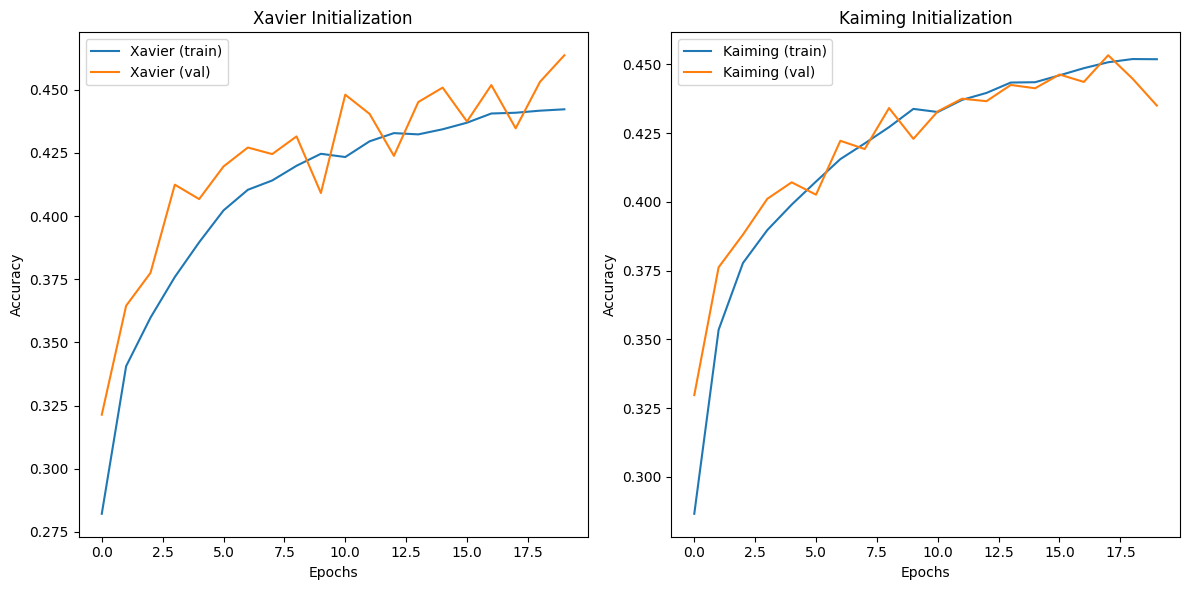

In [16]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(xavier_history.history['accuracy'], label='Xavier (train)')
plt.plot(xavier_history.history['val_accuracy'], label='Xavier (val)')
plt.title('Xavier Initialization')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(kaiming_history.history['accuracy'], label='Kaiming (train)')
plt.plot(kaiming_history.history['val_accuracy'], label='Kaiming (val)')
plt.title('Kaiming Initialization')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()